# WNTR Basic Tutorial
The following tutorial illustrates basic use of WNTR, including use of the `WaterNetworkModel` object, the ability to read/write model files to other formats, run hydraulic and water quality simulations, compute resilience metrics, define and use fragility curves, skeletonize water network models, identify network segments associated with isolation valves, and assign geospatial data to junctions and pipes.

## Imports
Import WNTR and additional Python packages that are needed for the tutorial
- Numpy is required to define comparison operators (i.e., np.greater) in queries
- Scipy is required to define lognormal fragility curves
- NetworkX is used to compute topographic metrics
- Geopandas is used to load geospatial data
- Matplotlib is required to create graphics

In [1]:
import numpy as np
from scipy.stats import lognorm
import networkx as nx
import geopandas as gpd
import matplotlib.pylab as plt
import wntr

## Units
WNTR uses SI (International System) units (length in meters, time in seconds, mass in kilograms).  See https://usepa.github.io/WNTR/units.html for more details.

# Water Network Model

The `WaterNetworkModel` object defines the water distribution system and simulation options. The object can be created from an EPANET INP file.

In [13]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [14]:
# Print a basic description of the model.  The level can be 0, 1, or 2 and defines the level of detail included in the description.
wn.describe(level=1)

{'Nodes': {'Junctions': 92, 'Tanks': 3, 'Reservoirs': 2},
 'Links': {'Pipes': 117, 'Pumps': 2, 'Valves': 0},
 'Patterns': 5,
 'Curves': {'Pump': 2, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 18}

In [15]:
# List properties and methods associated with the WaterNetworkModel (omitting private underscore names)
[name for name in dir(wn) if not name.startswith('_')]

['add_control',
 'add_curve',
 'add_junction',
 'add_pattern',
 'add_pipe',
 'add_pump',
 'add_reservoir',
 'add_source',
 'add_tank',
 'add_valve',
 'assign_demand',
 'control_name_list',
 'controls',
 'convert_controls_to_rules',
 'curve_name_list',
 'curves',
 'describe',
 'fcv_name_list',
 'fcvs',
 'from_dict',
 'from_gis',
 'get_control',
 'get_curve',
 'get_graph',
 'get_link',
 'get_links_for_node',
 'get_node',
 'get_pattern',
 'get_source',
 'gpv_name_list',
 'gpvs',
 'head_pump_name_list',
 'head_pumps',
 'junction_name_list',
 'junctions',
 'link_name_list',
 'links',
 'name',
 'node_name_list',
 'nodes',
 'num_controls',
 'num_curves',
 'num_junctions',
 'num_links',
 'num_nodes',
 'num_patterns',
 'num_pipes',
 'num_pumps',
 'num_reservoirs',
 'num_sources',
 'num_tanks',
 'num_valves',
 'options',
 'pattern_name_list',
 'patterns',
 'pbv_name_list',
 'pbvs',
 'pipe_name_list',
 'pipes',
 'power_pump_name_list',
 'power_pumps',
 'prv_name_list',
 'prvs',
 'psv_name_list',


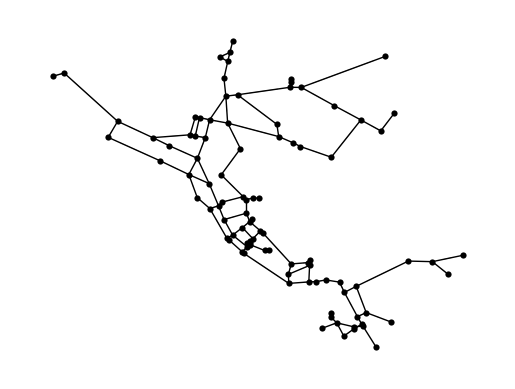

In [16]:
# Plot a basic network graphic
ax = wntr.graphics.plot_network(wn)

## Nodes
Nodes define junctions, tanks, and reservoirs

In [17]:
# Print the names of all junctions, tanks, and reservoirs
print("Node names", wn.node_name_list)

Node names ['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275', 'River', 'Lake', '1', '2', '3']


In [18]:
# Print the names of just tanks
print("Tank names", wn.tank_name_list)

Tank names ['1', '2', '3']


In [19]:
# Get a tank object
tank = wn.get_node('1')
print(type(tank))
tank

<class 'wntr.network.elements.Tank'>


<Tank '1', elevation=40.203120000000006, min_level=0.030480000000000004, max_level=9.784080000000001, diameter=25.908, min_vol=0.0, vol_curve='None'>

In [20]:
# List properties and methods associated with the tank (omitting private underscore names)
[name for name in dir(tank) if not name.startswith('_')]

['add_leak',
 'bulk_coeff',
 'coordinates',
 'demand',
 'diameter',
 'elevation',
 'get_volume',
 'head',
 'init_level',
 'initial_quality',
 'leak_area',
 'leak_demand',
 'leak_discharge_coeff',
 'leak_status',
 'level',
 'max_level',
 'min_level',
 'min_vol',
 'mixing_fraction',
 'mixing_model',
 'name',
 'node_type',
 'overflow',
 'pressure',
 'quality',
 'remove_leak',
 'tag',
 'to_dict',
 'to_ref',
 'vol_curve',
 'vol_curve_name']

In [21]:
# Change the max level of a tank
print("Original max level", tank.max_level)
tank.max_level = 10
print("New max level", tank.max_level)

Original max level 9.784080000000001
New max level 10


In [22]:
# Add a junction to the WaterNetworkModel
wn.add_junction('new_junction', base_demand=0.0, demand_pattern=None, elevation=0.0, coordinates=None, demand_category=None)
print(wn.junction_name_list)

['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275', 'new_junction']


In [23]:
# Remove a junction from the WaterNetworkModel
wn.remove_node('new_junction')
print(wn.junction_name_list)

['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275']


## Links
Links define pipes, pumps, and valves

In [24]:
# Print the names of all pipes, pumps, and valves
print("Link names", wn.link_name_list)

Link names ['20', '40', '50', '60', '101', '103', '105', '107', '109', '111', '112', '113', '114', '115', '116', '117', '119', '120', '121', '122', '123', '125', '129', '131', '133', '135', '137', '145', '147', '149', '151', '153', '155', '159', '161', '163', '169', '171', '173', '175', '177', '179', '180', '181', '183', '185', '186', '187', '189', '191', '193', '195', '197', '199', '201', '202', '203', '204', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '229', '231', '233', '235', '237', '238', '239', '240', '241', '243', '245', '247', '249', '251', '257', '261', '263', '269', '271', '273', '275', '277', '281', '283', '285', '287', '289', '291', '293', '295', '297', '299', '301', '303', '305', '307', '309', '311', '313', '315', '317', '319', '321', '323', '325', '329', '330', '333', '10', '335']


In [25]:
# Print the names of just head pumps
print("Head pump names", wn.head_pump_name_list)

Head pump names ['10', '335']


In [26]:
# Get the name of links connected to a specific node
connected_links = wn.get_links_for_node('229')
print('Links connected to node 229 =', connected_links)

Links connected to node 229 = ['261', '263', '271']


In [27]:
# Get a pipe object
pipe = wn.get_link('105')
print(type(pipe))
pipe

<class 'wntr.network.elements.Pipe'>


<Pipe '105' from '101' to '105', length=774.192, diameter=0.30479999999999996, roughness=130.0, minor_loss=0.0, check_valve=False, status=Open>

In [28]:
# List properties and methods associated with the pipe (omitting private underscore names)
[name for name in dir(pipe) if not name.startswith('_')]

['bulk_coeff',
 'check_valve',
 'cv',
 'diameter',
 'end_node',
 'end_node_name',
 'flow',
 'friction_factor',
 'headloss',
 'initial_setting',
 'initial_status',
 'length',
 'link_type',
 'minor_loss',
 'name',
 'quality',
 'reaction_rate',
 'roughness',
 'setting',
 'start_node',
 'start_node_name',
 'status',
 'tag',
 'to_dict',
 'to_ref',
 'velocity',
 'vertices',
 'wall_coeff']

In [29]:
# Change the diameter of a pipe
print("Original diameter", pipe.diameter)
pipe.diameter = 10
print("New diameter", pipe.diameter)

Original diameter 0.30479999999999996
New diameter 10


In [30]:
# Add a pipe to the WaterNetworkModel
wn.add_pipe(name="new_pipe", start_node_name="10", end_node_name="123", length=304.8, diameter=0.3048, roughness=100, minor_loss=0.0, initial_status='OPEN', check_valve=False)
print(wn.pipe_name_list)

['20', '40', '50', '60', '101', '103', '105', '107', '109', '111', '112', '113', '114', '115', '116', '117', '119', '120', '121', '122', '123', '125', '129', '131', '133', '135', '137', '145', '147', '149', '151', '153', '155', '159', '161', '163', '169', '171', '173', '175', '177', '179', '180', '181', '183', '185', '186', '187', '189', '191', '193', '195', '197', '199', '201', '202', '203', '204', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '229', '231', '233', '235', '237', '238', '239', '240', '241', '243', '245', '247', '249', '251', '257', '261', '263', '269', '271', '273', '275', '277', '281', '283', '285', '287', '289', '291', '293', '295', '297', '299', '301', '303', '305', '307', '309', '311', '313', '315', '317', '319', '321', '323', '325', '329', '330', '333', 'new_pipe']


In [31]:
# Remove a pipe from the WaterNetworkModel
wn.remove_link("new_pipe")
print(wn.pipe_name_list)

['20', '40', '50', '60', '101', '103', '105', '107', '109', '111', '112', '113', '114', '115', '116', '117', '119', '120', '121', '122', '123', '125', '129', '131', '133', '135', '137', '145', '147', '149', '151', '153', '155', '159', '161', '163', '169', '171', '173', '175', '177', '179', '180', '181', '183', '185', '186', '187', '189', '191', '193', '195', '197', '199', '201', '202', '203', '204', '205', '207', '209', '211', '213', '215', '217', '219', '221', '223', '225', '229', '231', '233', '235', '237', '238', '239', '240', '241', '243', '245', '247', '249', '251', '257', '261', '263', '269', '271', '273', '275', '277', '281', '283', '285', '287', '289', '291', '293', '295', '297', '299', '301', '303', '305', '307', '309', '311', '313', '315', '317', '319', '321', '323', '325', '329', '330', '333']


## Demands and Patterns
Junctions can have multiple demands which are stored as Timeseries objects in a `demand_timeseries_list`. Each Timeseries contains a base value, pattern, and category.  Patterns contain multipliers and the pattern timestep.  

The following example illustrates how to
* Compute expected demand (which accounts for base demand, demand patterns, and demand multiplier)
* Compute average expected demand (average value for a 24 hour period -  accounts for base demand, demand patterns, and demand multiplier)
* Add demands to a junction
* Modify demand base value and pattern
* Remove demands from a junction
* Plot expected and simulated demands

In [33]:
# Compute expected demand
expected_demand = wntr.metrics.expected_demand(wn)
expected_demand.head()

,10,15,20,35,40,50,60,601,61,101,...,257,259,261,263,265,267,269,271,273,275
0.0,0.0,0.039116,0.0,0.103279,0.0,0.0,0.0,0.0,0.0,0.016059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3600.0,0.0,0.039116,0.0,0.107632,0.0,0.0,0.0,0.0,0.0,0.023249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7200.0,0.0,0.039116,0.0,0.108452,0.0,0.0,0.0,0.0,0.0,0.017497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10800.0,0.0,0.039116,0.0,0.108452,0.0,0.0,0.0,0.0,0.0,0.017257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14400.0,0.0,0.039116,0.0,0.112995,0.0,0.0,0.0,0.0,0.0,0.009108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10    0.000000
15    0.016666
20    0.000000
35    0.108389
40    0.000000
dtype: float64


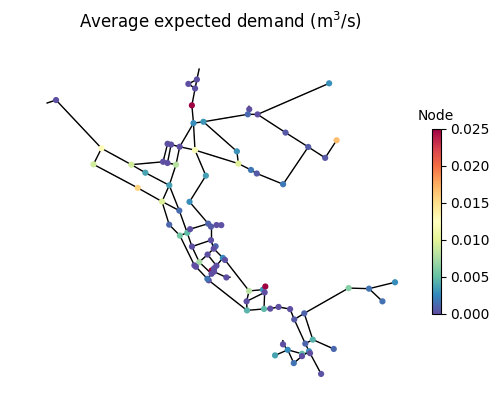

In [34]:
# Compute and plot average expected demand 
AED = wntr.metrics.average_expected_demand(wn)
print(AED.head())
ax = wntr.graphics.plot_network(wn, node_attribute=AED, node_range=(0,0.025), title='Average expected demand (m$^3$/s)')

Index(['10', '20', '40', '50', '60', '601', '61', '120', '129', '164', '169',
       '173', '179', '181', '183', '184', '187', '195', '204', '206', '208',
       '241', '249', '257', '259', '261', '263', '265', '267', '269', '271',
       '273', '275'],
      dtype='object')


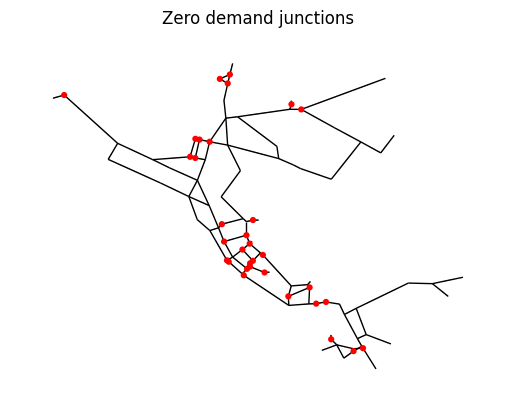

In [35]:
# Identify junctions with zero demand
zero_demand = AED[AED == 0].index
print(zero_demand)
ax = wntr.graphics.plot_network(wn, node_attribute=list(zero_demand), title='Zero demand junctions')

In [36]:
# Get the demands on Junction 15
junction = wn.get_node('15')
junction.demand_timeseries_list

<Demands: [<TimeSeries: base_value=6.30901964e-05, pattern_name='3', category='None'>]>

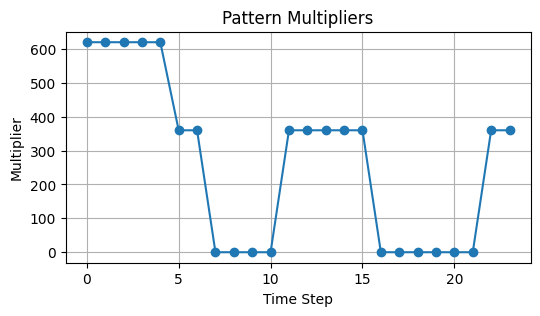

In [40]:
# Get the pattern associated with the demand
pattern = wn.get_pattern(junction.demand_timeseries_list[0].pattern_name)

# Plot the pattern multipliers
plt.figure(figsize=(6, 3))
plt.plot(pattern.multipliers, marker='o')
plt.title('Pattern Multipliers')
plt.xlabel('Time Step')
plt.ylabel('Multiplier')
plt.grid(True)
plt.show()

In [41]:
# Modify the base value of the demand
junction.demand_timeseries_list[0].base_value = 0.005

# Add a new pattern to the model
wn.add_pattern('New', [1,1,1,0,0,0,1,0,0.5,0.5,0.5,1])

# Use the new pattern to modify the junction demand
junction.demand_timeseries_list[0].pattern_name = "New"
print(junction.demand_timeseries_list)

<Demands: [<TimeSeries: base_value=0.005, pattern_name='New', category='None'>]>


In [42]:
# Add a demand to Junction 15
junction.add_demand(base=0.015, pattern_name='1')
print(junction.demand_timeseries_list)

<Demands: [<TimeSeries: base_value=0.005, pattern_name='New', category='None'>, <TimeSeries: base_value=0.015, pattern_name='1', category='None'>]>


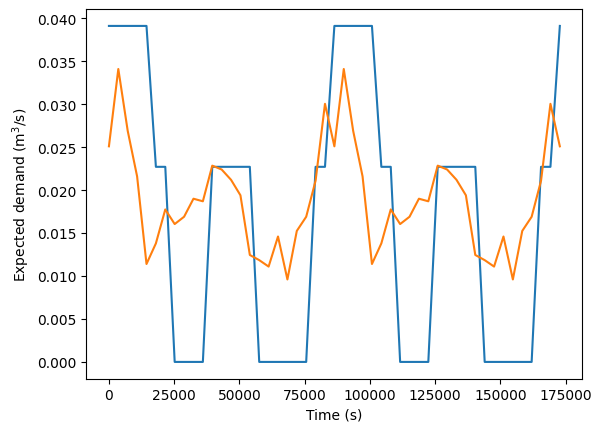

In [43]:
# Plot original and modified expected demands
new_expected_demand = wntr.metrics.expected_demand(wn) 

plt.figure()
ax = expected_demand.loc[0:48*3600, "15"].plot()
new_expected_demand.loc[0:48*3600, "15"].plot(ax=ax)
tmp = ax.set_xlabel('Time (s)')
tmp = ax.set_ylabel('Expected demand (m$^3$/s)')

## Curves
Curves define pump head curves, tank volume curves, and pump efficiency curves.  The following example illustrates how to work with pump head curves and tank volume curves.

<class 'wntr.network.elements.HeadPump'>


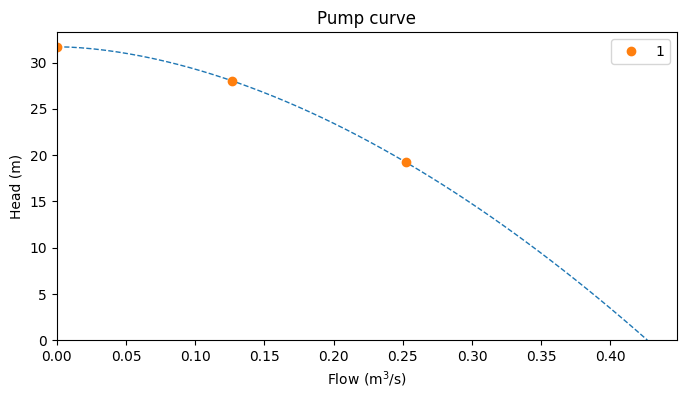

In [44]:
# Get a head pump object and plot the head pump curve
pump = wn.get_link('10')
print(type(pump))
ax = wntr.graphics.plot_pump_curve(pump)

In [45]:
# Get the head curve and print the points
pump_curve_name = pump.pump_curve_name
curve = wn.get_curve(pump_curve_name)
curve.points

[(0.0, 31.6992), (0.1261803928, 28.041600000000003), (0.2523607856, 19.2024)]

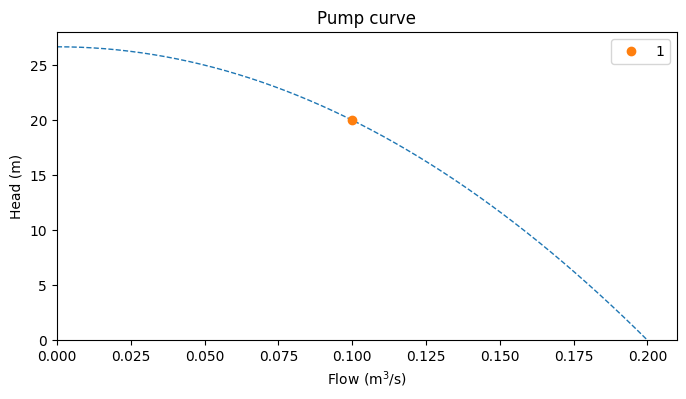

In [46]:
# Modify the curve points and re-plot the pump curve
curve.points = [(0.10, 20)]
ax = wntr.graphics.plot_pump_curve(pump)

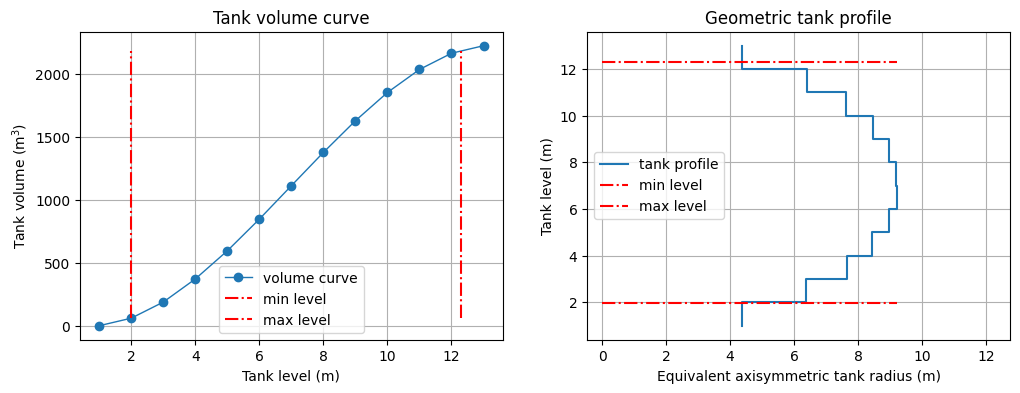

In [47]:
# Add a tank volume curve to the model and assign it to a tank
wn.add_curve('new_tank_curve', 'VOLUME', [
   (1,  0),
   (2,  60),
   (3,  188),
   (4,  372),
   (5,  596),
   (6,  848),
   (7,  1114),
   (8,  1379),
   (9,  1631),
   (10, 1856),
   (11, 2039),
   (12, 2168),
   (13, 2228)])
tank = wn.get_node('2')
tank.vol_curve_name = 'new_tank_curve'
ax = wntr.graphics.plot_tank_volume_curve(tank)

## Controls

Controls define conditions and actions that operate pipes, pumps, and valves.  WNTR includes support for EPANET controls and rules (note that both are stored as WNTR controls). As with EPANET, controls are evaluated after each simulation timestep, while rules are evaluated after each rule timestep (see `wn.options.time`). The method `convert_controls_to_rules` can be used to convert controls to rules, which can help avoid unintended behavior when controls and rules are both used in complex simulations.

In [49]:
# Get a list of control names
wn.control_name_list

['control 1',
 'control 2',
 'control 3',
 'control 4',
 'control 5',
 'control 6',
 'control 7',
 'control 8',
 'control 9',
 'control 10',
 'control 11',
 'control 12',
 'control 13',
 'control 14',
 'control 15',
 'control 16',
 'control 17',
 'control 18']

In [50]:
# Print all controls
for name, controls in wn.controls():
    print(name, controls)

control 1 IF SYSTEM TIME IS 01:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 2 IF SYSTEM TIME IS 15:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 3 IF SYSTEM TIME IS 25:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 4 IF SYSTEM TIME IS 39:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 5 IF SYSTEM TIME IS 49:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 6 IF SYSTEM TIME IS 63:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 7 IF SYSTEM TIME IS 73:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 8 IF SYSTEM TIME IS 87:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 9 IF SYSTEM TIME IS 97:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 10 IF SYSTEM TIME IS 111:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 11 IF SYSTEM TIME IS 121:00:00 THEN PUMP 10 STATUS IS OPEN PRIORITY 3
control 12 IF SYSTEM TIME IS 135:00:00 THEN PUMP 10 STATUS IS CLOSED PRIORITY 3
control 13 IF SYSTEM TIME IS 145:00:00 THEN PUMP 10 STATUS IS OPEN PRI

In [51]:
# Get a specific control object
control = wn.get_control('control 18')
print(control)

IF TANK 1 LEVEL ABOVE 5.821680000000001 THEN PIPE 330 STATUS IS OPEN PRIORITY 3


In [52]:
# Modify the control priority
control.update_priority(1)
print(control)

IF TANK 1 LEVEL ABOVE 5.821680000000001 THEN PIPE 330 STATUS IS OPEN PRIORITY 1


In [53]:
# Add a time based pump control
pump = wn.get_link('10')
action = wntr.network.controls.ControlAction(pump, 'status', 1)
condition = wntr.network.controls.SimTimeCondition(wn, '=', '121:00:00')
control = wntr.network.controls.Control(condition, action, name='new_control')
wn.add_control('NewControl', control)
print(wn.control_name_list)

['control 1', 'control 2', 'control 3', 'control 4', 'control 5', 'control 6', 'control 7', 'control 8', 'control 9', 'control 10', 'control 11', 'control 12', 'control 13', 'control 14', 'control 15', 'control 16', 'control 17', 'control 18', 'NewControl']


In [54]:
# Remove a control
wn.remove_control('NewControl')
print(wn.control_name_list)

['control 1', 'control 2', 'control 3', 'control 4', 'control 5', 'control 6', 'control 7', 'control 8', 'control 9', 'control 10', 'control 11', 'control 12', 'control 13', 'control 14', 'control 15', 'control 16', 'control 17', 'control 18']


In [55]:
# Convert controls to rules.  This can help avoid unintended behavior when controls and rules are both used in complex simulations.
wn.convert_controls_to_rules()

## Queries
Queries return attributes of nodes and links.  Comparison operations (like >, =) can be used to return a subset of attributes that meet specific criteria.

In [56]:
# Return all pipe diameters (no comparison operator used in the query) 
all_pipe_diameters = wn.query_link_attribute('diameter')
all_pipe_diameters.head()

20     2.5146
40     2.5146
50     2.5146
60     0.6096
101    0.4572
dtype: float64

In [57]:
# Return pipes diameters > 12 inches
large_pipe_diameters = wn.query_link_attribute('diameter', np.greater, 12*0.0254)
print("Number of pipes:", len(all_pipe_diameters))
print("Number of pipes > 12 inches:", len(large_pipe_diameters))

Number of pipes: 117
Number of pipes > 12 inches: 39


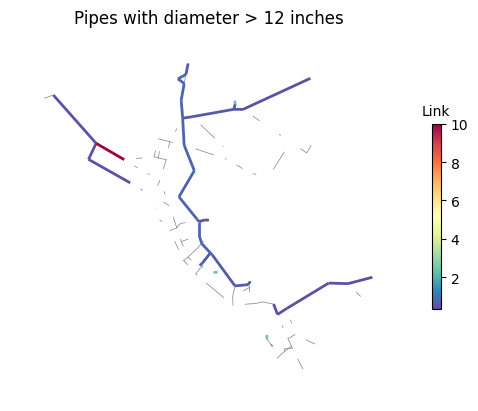

In [58]:
# Plot pipes diameters > 12 inches
ax = wntr.graphics.plot_network(wn, link_attribute=large_pipe_diameters, node_size=0, link_width=2, title="Pipes with diameter > 12 inches")

## Coordinates
Node coordinates can be obtained using a node query.  Node coordinates can also be modified using functions in `wntr.morph`

In [59]:
# Get node coordinates
coords = wn.query_node_attribute('coordinates')
coords

10         (9.0, 27.85)
15       (38.68, 23.76)
20       (29.44, 26.91)
35       (25.46, 10.52)
40        (27.02, 9.81)
              ...      
River    (24.15, 31.06)
Lake       (8.0, 27.53)
1         (27.46, 9.84)
2         (32.99, 3.45)
3        (29.41, 27.27)
Length: 97, dtype: object

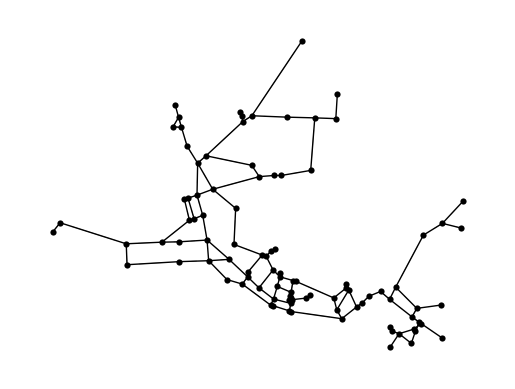

In [60]:
# Rotate node coordinates counterclockwise by 30 degrees
wn_rotated = wntr.morph.rotate_node_coordinates(wn, 30)
ax = wntr.graphics.plot_network(wn_rotated)

## Loops and generators
Loops and generators are commonly used to modify network components or run stochastic simulations

In [61]:
# Loop over tank names and objects with a generator
for name, tank in wn.tanks():
    print("Max level for tank", name, "=", tank.max_level)

Max level for tank 1 = 10
Max level for tank 2 = 12.28344
Max level for tank 3 = 10.820400000000001


In [62]:
# Loop over tank names and then get the associated tank object
for name in wn.tank_name_list:
    tank = wn.get_node(name)
    print("Max level for tank", name, "=", tank.max_level)

Max level for tank 1 = 10
Max level for tank 2 = 12.28344
Max level for tank 3 = 10.820400000000001


## Pipe breaks and leaks
Pipes can be split (adding 1 junction to the model) or broken (adding two junctions to the model) using the `split_pipe` and `break_pipe` functions.  While a split pipe retains the network connectivity, a broken pipe does not connect across the break.  By default these functions return a copy of the WaterNetworkModel.

In [63]:
# Split pipe 123 and add a leak to the new node which starts at hour 2 and ends at hour 12
wn = wntr.morph.split_pipe(wn, pipe_name_to_split='123', new_pipe_name='123_B', new_junction_name='123_node')
leak_node = wn.get_node('123_node')
leak_node.add_leak(wn, area=0.05, start_time=2*3600, end_time=12*3600)

In [64]:
# Break pipe 121
wn = wntr.morph.break_pipe(wn, pipe_name_to_split='121', new_pipe_name='121_B', 
                           new_junction_name_old_pipe='121_node', new_junction_name_new_pipe='121B_node')

# Model I/O
A `WaterNetworkModel` can be converted to and from the following data formats and file types: 
* EPANET INP file
* dictionary
* JSON file
* NetworkX graph
* Geopandas GeoDataFrame
* GeoJSON and Shapefile file

In [65]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

## EPANET INP files
WaterNetworkModel objects are commonly built from EPANET INP files.  WaterNetworkModel objects can also be saved as an EPANET INP file. Note that model attributes that are not EPANET compatible will not be saved in the INP file (i.e., leak attributes).

In [66]:
# Create an EPANET INP file from a WaterNetworkModel
wntr.network.write_inpfile(wn, 'Net3_LPS.inp', units='LPS')

# Create a WaterNetworkModel from an EPANET INP file.  Note, this is equivalent to running `wn = wntr.network.WaterNetworkModel('Net3_LPS.inp')`
wn2 = wntr.network.read_inpfile('Net3_LPS.inp') 

## Dictionaries
Dictionaries offer a convenient Python format to store all the information in a WaterNetworkModel object. The dictionary can be saved to a file (typically a JSON file) to save the model. Unlike an EPANET INP file, dictionaries can contain custom model attributes.

In [67]:
# Convert the WaterNetworkModel to a dictionary
wn_dict = wn.to_dict()
print(wn_dict.keys())

# Create a WaterNetworkModel from a dictionary
wn2 = wntr.network.from_dict(wn_dict)

dict_keys(['version', 'comment', 'name', 'options', 'curves', 'patterns', 'nodes', 'links', 'sources', 'controls'])


## JSON files
JSON files can be created directly from a WaterNetworkModel object and hold the same information as the dictionary representation.

In [68]:
# Create a JSON file from the WaterNetworkModel
wntr.network.write_json(wn, 'Net3.json')

# Create a WaterNetworkModel from a JSON file
wn2 = wntr.network.read_json('Net3.json')

## NetworkX graphs
Graphs facilitate topographic analysis using NetworkX. WaterNetworkModel objects are represented as a MultiDiGraph, which can have multiple edges between nodes and are directed (from start node to end node). Note that WaterNetworkModel objects cannot currently be created from NetworkX graphs.

In [69]:
# Convert the WaterNetworkModel to a MultiDiGraph
G = wntr.network.to_graph(wn)
print(G)

MultiDiGraph with 97 nodes and 119 edges


## GeoPandas GeoDataFrames
GeoDataFrames store network attributes and geospatial geometry of junctions, tanks, reservoirs, pipes, pumps, and valves.  GeoDataFrames can be used in geospatial analysis, such as spap and intersection with other geospatial data. Note that WaterNetworkModels created from a collection of GeoDataFrames will not contain patterns, curves, rules, controls, or sources. The GeoDataFrames can be saved to file (typically GeoJSON or Shapefile) and loaded into GIS software platforms for further analysis.

In [ ]:
# Convert the WaterNetworkModel to a collection of GeoDataFrames
wn_gis = wntr.network.to_gis(wn)
print(wn_gis.junctions.head())
#print(wn_gis.tanks.head())
#print(wn_gis.reservoirs.head())
#print(wn_gis.pipes.head())
#print(wn_gis.pumps.head())
#print(wn_gis.valves.head())

# Create a WaterNetworkModel from a collection of GeoDataFrames
wn2 = wntr.network.from_gis(wn_gis)

## GeoJSON files and ESRI Shapefile files
GeoJSON and ESRI Shapefile files can be created directly from a WaterNetworkModel object.  The files can be loaded into GIS software platforms for further analysis. Note that column names longer than 10 characters will be truncated when saved to Shapefile. 

WaterNetworkModels can also be created from GeoJSON files or Shapefiles. A specific set of column names are required to define junctions, tanks, reservoirs, pipes, pumps, and valves (see the use of `valid_gis_names` below). Model attributes including controls, patterns, curves, and options need to be added separately.

In [ ]:
# Create GeoJSON files from the WaterNetworkModel
wntr.network.write_geojson(wn, 'Net3')

# Create a WaterNetworkModel from GeoJSON files
geojson_files = {'junctions': 'Net3_junctions.geojson',
                 'tanks': 'Net3_tanks.geojson',
                 'reservoirs': 'Net3_reservoirs.geojson',
                 'pipes': 'Net3_pipes.geojson',
                 'pumps': 'Net3_pumps.geojson'}
wn2 = wntr.network.read_geojson(geojson_files)

In [ ]:
# Compare model attributes of the original model with the model built from Shapefiles (note the absence of patterns and controls)
print(wn.describe(level=1))
print(wn2.describe(level=1))

In [ ]:
# Create Shapefiles from the WaterNetworkModel.  The following code will produce UserWarnings: "Column names longer than 10 characters will be truncated when saved to ESRI Shapefile."
wntr.network.write_shapefile(wn, 'Net3')

# Create a WaterNetworkModel from Shapefiles
shapefile_dirs = {'junctions': 'Net3_junctions',
                  'tanks': 'Net3_tanks',
                  'reservoirs': 'Net3_reservoirs',
                  'pipes': 'Net3_pipes',
                  'pumps': 'Net3_pumps'}
wn2 = wntr.network.read_shapefile(shapefile_dirs)

In [ ]:
# Compare model attributes of the original model with the model built from Shapefiles (note the absence of patterns and controls)
print(wn.describe(level=1))
print(wn2.describe(level=1))

In [ ]:
# Print valid GeoJSON or Shapefiles column names required to build a model
column_names = wntr.network.io.valid_gis_names()
print("Junction column names", column_names['junctions'])
print()
print("Tank column names", column_names['tanks'])
print()
print("Reservoir column names", column_names['reservoirs'])
print()
print("Pipe column names", column_names['pipes'])
print()
print("Pump column names", column_names['pumps'])
print()
print("Valve column names", column_names['valves'])

# Hydraulic and Water Quality Simulations

WNTR includes two simulators: the `EpanetSimulator` and the `WNTRSimulator`.  Both include the ability to run pressure dependent demand (PDD) or demand-driven (DD) hydraulic simulation.  Only the EpanetSimulator runs water quality simulations.

In [70]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

## Simulation options
Simulation options include options related to simulation time, hydraulics, water quality, reactions, energy calculations, reporting, graphics, and user/custom options.

In [71]:
# Print the WaterNetworkModel options
wn.options

Options(time=TimeOptions(duration=604800.0, hydraulic_timestep=3600, quality_timestep=300, rule_timestep=360, pattern_timestep=3600, pattern_start=0.0, report_timestep=3600, report_start=0.0, start_clocktime=0.0, statistic='NONE', pattern_interpolation=False), hydraulic=HydraulicOptions(headloss='H-W', hydraulics=None, hydraulics_filename=None, viscosity=1.0, specific_gravity=1.0, pattern='1', demand_multiplier=1.0, demand_model='DDA', minimum_pressure=0.0, required_pressure=0.07, pressure_exponent=0.5, emitter_exponent=0.5, trials=40, accuracy=0.001, unbalanced='CONTINUE', unbalanced_value=10, checkfreq=2, maxcheck=10, damplimit=0.0, headerror=0.0, flowchange=0.0, inpfile_units='GPM', inpfile_pressure_units=None), report=ReportOptions(pagesize=0, report_filename=None, status='YES', summary='NO', energy='NO', nodes=False, links=False, report_params={'elevation': False, 'demand': True, 'head': True, 'pressure': True, 'quality': True, 'length': False, 'diameter': False, 'flow': True, 've

In [72]:
# Change the simulation duration to 4 days
wn.options.time.duration = 4*24*3600 # seconds
print(wn.options.time)

TimeOptions(duration=345600.0, hydraulic_timestep=3600, quality_timestep=300, rule_timestep=360, pattern_timestep=3600, pattern_start=0.0, report_timestep=3600, report_start=0.0, start_clocktime=0.0, statistic='NONE', pattern_interpolation=False)


In [73]:
# Change the simulation to use pressure dependent hydraulic analysis
wn.options.hydraulic.demand_model = 'PDD'
wn.options.hydraulic.required_pressure = 20 # m
wn.options.hydraulic.minimum_pressure = 2 # m
print(wn.options.hydraulic)

HydraulicOptions(headloss='H-W', hydraulics=None, hydraulics_filename=None, viscosity=1.0, specific_gravity=1.0, pattern='1', demand_multiplier=1.0, demand_model='PDA', minimum_pressure=2.0, required_pressure=20.0, pressure_exponent=0.5, emitter_exponent=0.5, trials=40, accuracy=0.001, unbalanced='CONTINUE', unbalanced_value=10, checkfreq=2, maxcheck=10, damplimit=0.0, headerror=0.0, flowchange=0.0, inpfile_units='GPM', inpfile_pressure_units=None)


## EPANET and WNTR Simulators

In [74]:
# Simulate hydraulics using EPANET
sim = wntr.sim.EpanetSimulator(wn)
results_EPANET = sim.run_sim()

In [75]:
# Simulate hydraulics using the WNTRSimulator
sim = wntr.sim.WNTRSimulator(wn)
results_WNTR = sim.run_sim()

## Simulation results
Simulation results are stored in an object which includes a dictionary of DataFrames for nodes and a dictionary of DataFrames for links.  Each DataFrame is indexed by time (in seconds) and the columns are node or link names.

In [76]:
# Print available node results
results_EPANET.node.keys()

dict_keys(['demand', 'head', 'pressure', 'quality'])

In [77]:
# Print available link results
results_EPANET.link.keys()

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])

In [78]:
# View EpanetSimulator pressure results
results_EPANET.node['pressure'].head()

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,-0.450080,28.593636,8.839204,40.612465,3.992880,7.162800,63.706444,92.187874,92.187874,31.553921,...,38.151539,44.650833,42.623013,40.477547,39.655285,0.0,0.0,3.992880,7.162800,8.839199
3600,28.253716,28.887127,9.099179,41.513763,4.191198,6.752890,63.751488,92.490318,92.490318,39.867863,...,39.722359,45.767292,43.530811,41.041168,40.189747,0.0,0.0,4.191198,6.752890,9.099170
7200,28.764303,30.003204,9.450781,42.429096,4.620549,6.369755,63.793495,92.773643,92.773643,41.517052,...,40.730839,46.730690,44.450718,41.956619,41.098690,0.0,0.0,4.620549,6.369755,9.450771
10800,28.871414,30.415548,9.869704,42.817165,5.158953,6.534982,63.813141,92.906601,92.906601,41.862648,...,41.116512,47.115627,44.837067,42.284958,41.419250,0.0,0.0,5.158953,6.534982,9.869690
14400,29.659277,31.970718,10.284725,44.297867,5.665968,6.740026,63.877914,93.346970,93.346970,44.400738,...,42.755882,48.670082,46.327454,43.938843,43.075657,0.0,0.0,5.665964,6.740026,10.284706


Text(0, 0.5, 'Pressure difference (m)')

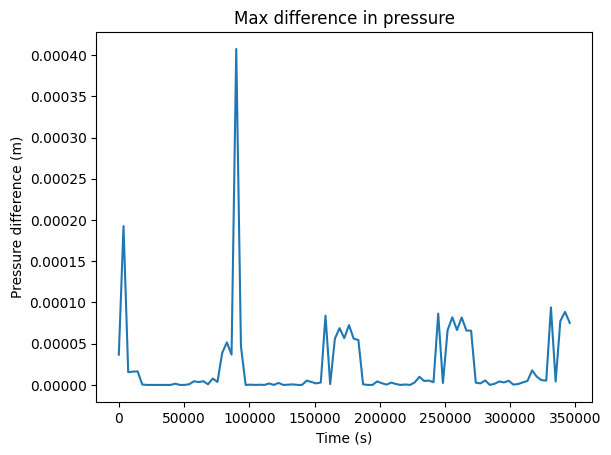

In [79]:
# Compare EpanetSimulator and WNTRSimulator pressure results
diff = results_EPANET.node['pressure'] - results_WNTR.node['pressure']
ax = diff.max(axis=1).plot(title='Max difference in pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure difference (m)')

Text(0, 0.5, 'Tank Level (m)')

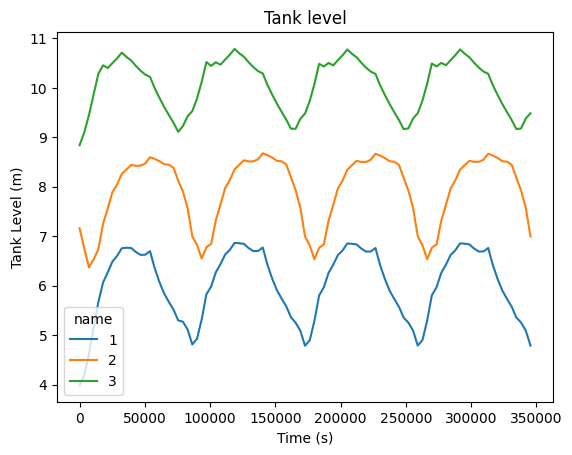

In [80]:
# Plot timeseries of tank levels
tank_levels = results_EPANET.node['pressure'].loc[:,wn.tank_name_list]
ax = tank_levels.plot(title='Tank level')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Tank Level (m)')

Text(0, 0.5, 'Pump flowrate (m$^3$/s)')

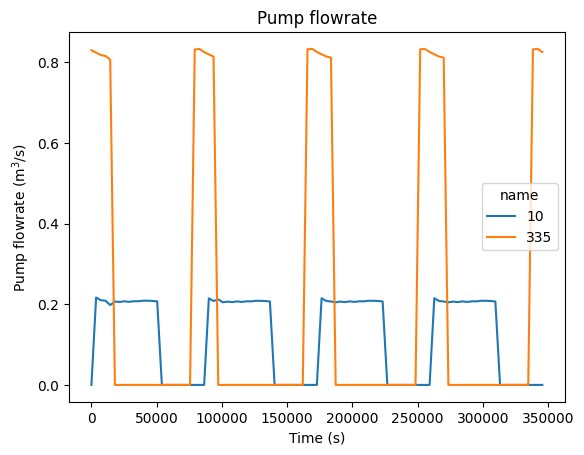

In [81]:
# Plot timeseries of pump flowrates
pump_flowrates = results_EPANET.link['flowrate'].loc[:,wn.pump_name_list]
ax = pump_flowrates.plot(title='Pump flowrate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

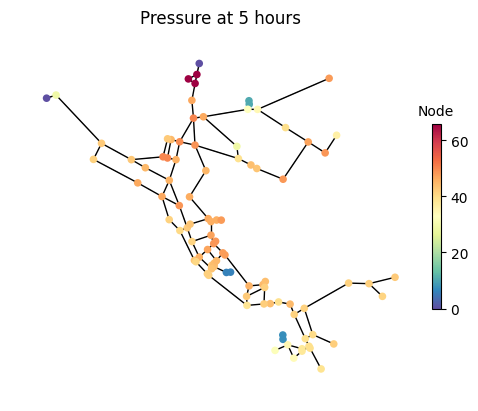

In [82]:
# Plot pressure at hour 5 on the network
pressure_at_5hr = results_EPANET.node['pressure'].loc[5*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=30, title='Pressure at 5 hours')

## Reset initial conditions
Reset initial values, including simulation time, tank head, reservoir head, pipe status, pump status, and valve status.  This is required when using the WNTRSimulator in multiple simulations. Note, the EPANETSimulator is automatically reset.

In [83]:
wn.reset_initial_values()

# Resilience Metrics

WNTR includes a wide range of metrics that can be used to compute resilience and related properties.

In [ ]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

## Topographic
Topographic metrics describe the physical layout of the system.

In [ ]:
# Convert the WaterNetworkModel to a MultiDiGraph
G = wn.to_graph() # directed multigraph

In [ ]:
# Some topographic metrics require an undirected graph or a graph with a single edge between two nodes
uG = G.to_undirected() # undirected multigraph
sG = nx.Graph(uG) # undirected simple graph (single edge between two nodes)

In [ ]:
# Articulation points
articulation_points = list(nx.articulation_points(uG))
ax = wntr.graphics.plot_network(wn, node_attribute=articulation_points, title="Articulation points")

In [ ]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
ax = wntr.graphics.plot_network(wn, node_attribute=betweenness_centrality, title="Betweenness centrality")

## Hydraulic
Hydraulic metrics are based on flow, demand, and/or pressure

In [84]:
# Run a pressure dependent hydraulic simulation
wn.options.hydraulic.demand_model = 'PDD'
wn.options.hydraulic.required_pressure = 50 # m, The required pressure is set to create a scenario where not all demands are met

sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

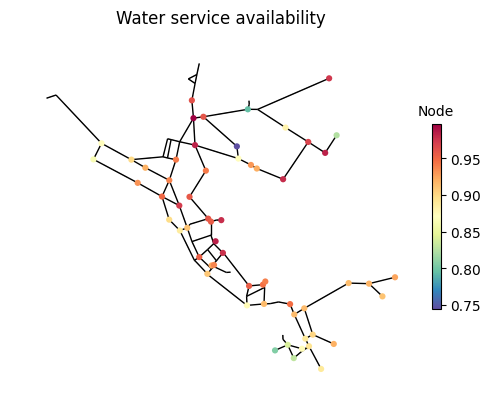

In [85]:
# Compute water service availability, defined as the ratio of delivered demand to the expected demand. 
expected_demand = wntr.metrics.expected_demand(wn)
demand = results.node['demand'].loc[:,wn.junction_name_list]
wsa = wntr.metrics.water_service_availability(expected_demand.sum(axis=0), demand.sum(axis=0))
ax = wntr.graphics.plot_network(wn, node_attribute=wsa, title='Water service availability')

## Water Quality
Water quality metrics are based on the concentration or water age.

In [ ]:
# Compute water age using the last 48 hours of a water quality simulation
wn.options.quality.parameter = 'AGE'
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

age = results.node['quality']
age_last_48h = age.loc[age.index[-1]-48*3600:age.index[-1]]
average_age = age_last_48h.mean()/3600 # convert to hours for the plot
ax = wntr.graphics.plot_network(wn, node_attribute=average_age, title="Average water age (hr)")

In [ ]:
# Compute the population that is impacted by water age greater than 24 hours
pop = wntr.metrics.population(wn)
threshold = 24 # hours
pop_impacted = wntr.metrics.population_impacted(pop, average_age, np.greater, threshold)
ax = wntr.graphics.plot_network(wn, node_attribute=pop_impacted, title="Population impacted by water age > 24 hours")

# Fragility Curves

Fragility curves define the probability of exceeding a damage state as a function of environmental condition.  Fragility curves are commonly used in earthquake analysis, but can be defined for other scenarios.

In [ ]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [ ]:
FC = wntr.scenario.FragilityCurve()
FC.add_state('Minor', 1, {'Default': lognorm(0.5,scale=0.3)})
FC.add_state('Major', 2, {'Default': lognorm(0.5,scale=0.7)})
ax = wntr.graphics.plot_fragility_curve(FC, xlabel='Peak Ground Acceleration (g)')

In [ ]:
# Model peak ground acceleration from a magnitude 6.5 earthquake, assigning values to pipes.
wn = wntr.morph.scale_node_coordinates(wn, 1000)
epicenter = (32000,15000) # x,y location
magnitude = 6.5 # Richter scale
depth = 10000 # m, shallow depth
earthquake = wntr.scenario.Earthquake(epicenter, magnitude, depth)
distance = earthquake.distance_to_epicenter(wn, element_type=wntr.network.Pipe)
pga = earthquake.pga_attenuation_model(distance)
ax = wntr.graphics.plot_network(wn, link_attribute=pga, node_size=0, link_width=2)

In [ ]:
# Sample the failure probability and damage states for each pipe
failure_probability = FC.cdf_probability(pga)
damage_state = FC.sample_damage_state(failure_probability)

In [ ]:
# Plot damage state (converted to numeric values) on the network
priority_map = FC.get_priority_map()
damage_value = damage_state.map(priority_map)
custom_cmp = wntr.graphics.custom_colormap(3, ['grey', 'royalblue', 'darkorange'])
ax = wntr.graphics.plot_network(wn, link_attribute=damage_value,
    node_size=0, link_width=2, link_cmap=custom_cmp,
    title='Damage state: 0=None, 1=Minor, 2=Major')

# Network Skeletonization

Network skeletonization reduces the size of a WaterNetworkModel with the goal of having minimal impact on hydraulics. 

The skeletonization process retains all tanks, reservoirs, valves, and pumps, along with all junctions and pipes that are associated with controls. Junction demands and demand patterns are retained in the skeletonized model. Merged pipes are assigned equivalent properties for diameter, length, and roughness to approximate the updated system behavior. Pipes that are less than or equal to a user-defined pipe diameter threshold are candidates for removal based on branch trimming, series and parallel pipe merge.

In [ ]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net6.inp')
wn.describe(level=1)

In [ ]:
# Skeletonize the network using a 12 inch pipe diameter threshold
skel_wn = wntr.morph.skeletonize(wn, 12*0.0254)
skel_wn.describe(level=1)

In [ ]:
# Plot the original and skeletonized networks
ax = wntr.graphics.plot_network(wn, node_size=0, title='Original')
ax = wntr.graphics.plot_network(skel_wn, node_size=0, title='Skeletonized')

In [ ]:
# Simulate hydraulics on the original and skeletonized models and plot average pressure
sim = wntr.sim.EpanetSimulator(wn)
results_original = sim.run_sim()

sim = wntr.sim.EpanetSimulator(skel_wn)
results_skel = sim.run_sim()

In [ ]:
# Plot average pressure at junctions that exist in both the original and skeletonized model
skel_junctions = skel_wn.junction_name_list
pressure_orig = results_original.node['pressure'].loc[:,skel_junctions]
pressure_skel = results_skel.node['pressure'].loc[:,skel_junctions]

ax = pressure_orig.mean(axis=1).plot(label='Original')
ax = pressure_skel.mean(axis=1).plot(ax=ax, label='Skeletonized')
plt.title('Average pressure')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pressure (m)')
plt.legend()

# Valve Segmentation

Valve segmentation groups links and nodes into segments based on the location of isolation valves. Unlike valves that are part of a WaterNetworkModel and used in hydraulic simulations (i.e. PRV, FCV), isolation valves are not included in the WaterNetworkModel and are defined as a separate data layer.

In [ ]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net3.inp')

In [ ]:
# Create a N-2 strategic valve layer.  Note that the user can create strategic or random valve placements, or use real valve data.
valve_layer = wntr.network.generate_valve_layer(wn, 'strategic', 2)
ax = wntr.graphics.plot_valve_layer(wn, valve_layer, add_colorbar=False)

In [ ]:
# Identify nodes and links that are in each valve segment
G = wn.to_graph()
node_segments, link_segments, seg_sizes = wntr.metrics.topographic.valve_segments(G, valve_layer)
seg_sizes.head()

In [ ]:
# Plot segments
N = seg_sizes.shape[0] # number of segments
cmap = wntr.graphics.random_colormap(N) # random color map helps visualize segments
ax = wntr.graphics.plot_network(wn, link_attribute=link_segments, node_size=0, link_width=2, link_range=[0,N],  link_cmap=cmap, title='Valve segment ID')

# Geospatial Capabilities
Geospatial data can be used within WNTR to build a WaterNetworkModel, associate geospatial data with nodes and links, and save simulation results to GIS compatible files.

**Note,  this example assumes the coordinate reference system (CRS) for the WaterNetworkModel and GIS data are in EPSG:4326 (lat/long). Geographic CRS are not suitable for measuring distance and the example will result in UserWarnings.  The example will be updated to use a projected CRS at a later date.**

In [ ]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('../networks/Net1.inp')

In [ ]:
# Convert a WaterNetworkModel to a collection of GeoDataFrames in EPSG:4326 coordinates
wn_gis = wntr.network.to_gis(wn, crs='EPSG:4326')
wn_gis.pipes.head()

In [ ]:
# Load hydrant data
hydrant_data = gpd.read_file('../data/Net1_hydrant_data.geojson') 
print(hydrant_data.crs)
hydrant_data.head()

## Snap data
The `snap` function is used to find the nearest point or line to a set of points. 

In [ ]:
# Snap hydrants to junctions
snapped_to_junctions = wntr.gis.snap(hydrant_data, wn_gis.junctions, tolerance=5.0)
snapped_to_junctions.head()

In [ ]:
# Plot results
ax = hydrant_data.plot()
ax.set_aspect('equal', adjustable='box')
ax = wntr.graphics.plot_network(wn, node_attribute=snapped_to_junctions['node'].to_list(), ax=ax)

## Intersect data
The `intersect` function is used to find the intersection between geometries.

In [ ]:
# Load demographic data associated with census block groups
demographic_data = gpd.read_file('../data/Net1_demographic_data.geojson') 
demographic_data.head()

In [ ]:
# Intersect junctions with census block groups, extract mean income
junction_demographics = wntr.gis.intersect(wn_gis.junctions, demographic_data, 'mean_income')
junction_demographics.head()

In [ ]:
# Intersect pipes with census block groups, extract mean income
pipe_demographics = wntr.gis.intersect(wn_gis.pipes, demographic_data, 'mean_income')
pipe_demographics.head()

In [ ]:
# Plot results
ax = demographic_data.plot(column='mean_income', alpha=0.5, cmap='bone', vmin=10000, vmax=100000)
ax.set_aspect('equal', adjustable='box')
ax = wntr.graphics.plot_network(wn, 
                                node_attribute=junction_demographics['mean'], 
                                link_attribute=pipe_demographics['weighted_mean'], 
                                link_width=1.5, ax=ax, title='Mean income ($)')

## Write analysis results to GIS files
In addition to the node and link attributes stored in the `WaterNetworkGIS` object, additional analysis results can be stored and saved to GIS compatible files.

In [ ]:
# Compute betweenness centrality and add it to the WaterNetworkGIS object
G = wn.to_graph() # directed multigraph
betweenness_centrality = nx.betweenness_centrality(G)

wn_gis.add_node_attributes(betweenness_centrality, 'betweenness_centrality')
wn_gis.junctions.head()

In [ ]:
# Run a hydraulic simulation and store average flowrate to the WaterNetworkGIS object
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
flowrate = results.link['flowrate'].mean()

wn_gis.add_link_attributes(flowrate, 'flowrate')
wn_gis.pipes.head()

In [ ]:
# Write the model and analysis results to GIS compatible files.  These files can be loaded into GIS platforms for further analysis.
wn_gis.write_geojson('Net3_analysis')